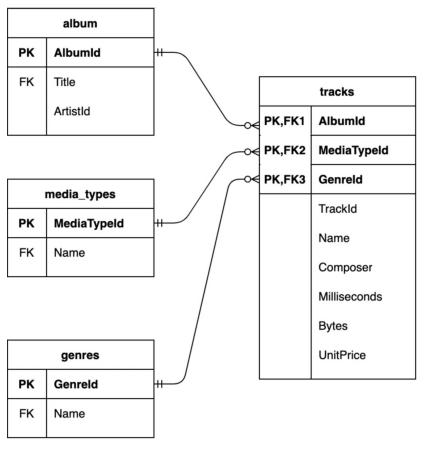

In [145]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
 
ERD = mpimg.imread('ERD.png') 
plt.figure(figsize=(10,8)) 
 
plt.imshow(ERD) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [110]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
df = pd.DataFrame(result, columns=[ 
'Track ID','Track Name','Album Titles','Media Type','Genres'
  ])
con.close()
df

Entry successfully retrieved.


,Track ID,Track Name,Album Titles,Media Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [1]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
sql = 'CREATE TABLE remix_table AS SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;'
try:
    cursor.execute(sql)
    con.commit()
    print("Table successfully created.")
except Exception as e:
    print("Exception occurred.",e)
cursor.close()
con.close()

Table successfully created.


Entry successfully retrieved.
<class 'list'>
[('Rock', 1297), ('Latin', 579), ('Metal', 374), ('Alternative & Punk', 332), ('Jazz', 130), ('TV Shows', 93), ('Blues', 81), ('Classical', 74), ('Drama', 64), ('R&B/Soul', 61)]
                    0     1
0                Rock  1297
1               Latin   579
2               Metal   374
3  Alternative & Punk   332
4                Jazz   130
5            TV Shows    93
6               Blues    81
7           Classical    74
8               Drama    64
9            R&B/Soul    61




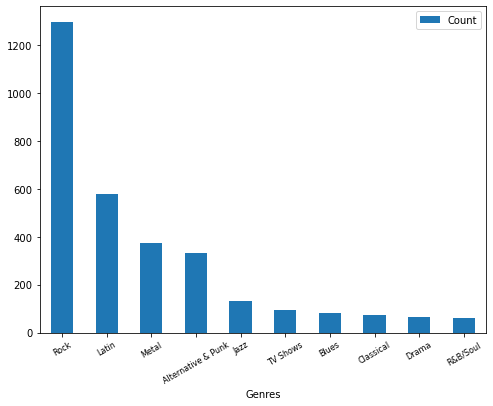

In [135]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
import pylab as pl
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
sql = "SELECT genres, COUNT(*) AS count FROM remix_table GROUP BY genres HAVING COUNT(*) ORDER BY count DESC LIMIT 10;"  # Select aggregated value and GROUP the result.
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
print(type(result))
print(result)
print(pd.DataFrame(result)) 
print('\n')
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df
#https://www.delftstack.com/zh/howto/matplotlib/pandas-plot-multiple-columns-on-bar-chart-matplotlib/
df.plot(x="Genres", y=["Count"], kind="bar",figsize=(8,6))
pl.xticks(rotation=30)
plt.tick_params(axis='x', labelsize=8)  
plt.show()